In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1** DATA CLEANING

In [2]:
df = pd.read_csv("Student Evaluation.csv")
print(df.head())

   Student_ID   Name  Subject  Score  Hours_Studied Gender Region
0           1   Asha     Math   78.0           10.0      F  North
1           2    Raj  Science   65.0            8.0      M  South
2           3  Priya  English   82.0           12.0      F   East
3           4  Karan     Math   55.0            6.0      M   West
4           5   Neha  Science   92.0           14.0      F  North


In [3]:
df.isnull().sum()            #finding null values

Student_ID       0
Name             0
Subject          0
Score            3
Hours_Studied    3
Gender           0
Region           0
dtype: int64

In [4]:
df['Score'] = df.groupby('Subject')['Score'].transform(lambda x: x.fillna(x.mean()))         #filling missing score with avg of each subject


In [5]:
hours_mean = df["Hours_Studied"].mean()             #filling missing values in hours studied
print("hours_mean")

#Replace missing values with this mean
df["Hours_Studied"].fillna(hours_mean, inplace=True)

hours_mean


C:\Users\PC\AppData\Local\Temp\ipykernel_19608\3262374902.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hours_Studied"].fillna(hours_mean, inplace=True)


In [6]:
df.isnull().sum()            #all missing values have been filled

Student_ID       0
Name             0
Subject          0
Score            0
Hours_Studied    0
Gender           0
Region           0
dtype: int64

In [7]:
df.dropna(subset=["Score", "Hours_Studied"], how="all", inplace=True)         #drop null values if remaining

**Task 2** SUBJECT WISE ANALYSIS

In [8]:
avg_score =  df.groupby('Subject')['Score'].mean()      #average score of each subject
avg_score

Subject
English    76.600000
Math       80.000000
Science    71.666667
Name: Score, dtype: float64

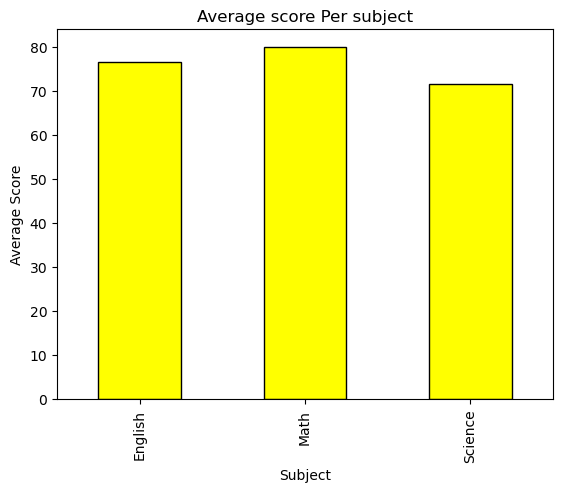

In [27]:
avg_score.plot(kind ="bar", color = "yellow", edgecolor = "black" )
plt.title("Average score Per subject")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.show()

In [9]:
highest_avg = avg_score.idxmax() 
print("Subject with higest average score:" ,highest_avg)        #siubject with highest average score

Subject with higest average score: Math


In [10]:
avg_hours = df.groupby('Subject')["Hours_Studied"].mean()
avg_hours                                                         #average hours studied per subject


Subject
English    10.333333
Math       11.655462
Science     9.739496
Name: Hours_Studied, dtype: float64

In [11]:
highest_avg_hours = avg_hours.idxmax()
print("subject where students studied the most hours on average:", highest_avg_hours) #subject with highest average study time

subject where students studied the most hours on average: Math


In [26]:
                                                                                                            # Find top performer (highest Score) in each Subject
top_performers = df.loc[df.groupby("Subject")["Score"].idxmax(), ["Subject", "Name", "Score"]]

print("Top Performer in Each Subject:\n")
print(top_performers)


Top Performer in Each Subject:

    Subject    Name  Score
11  English  Aditya   90.0
18     Math    Isha   93.0
4   Science    Neha   92.0


**Task 3** REGIONAL ANALYSIS

In [13]:
regional_avg = df.groupby("Region")["Score"].mean()
print("Regional average score:")
print(regional_avg)

Regional average score:
Region
East     78.800000
North    76.333333
South    78.120000
West     71.000000
Name: Score, dtype: float64


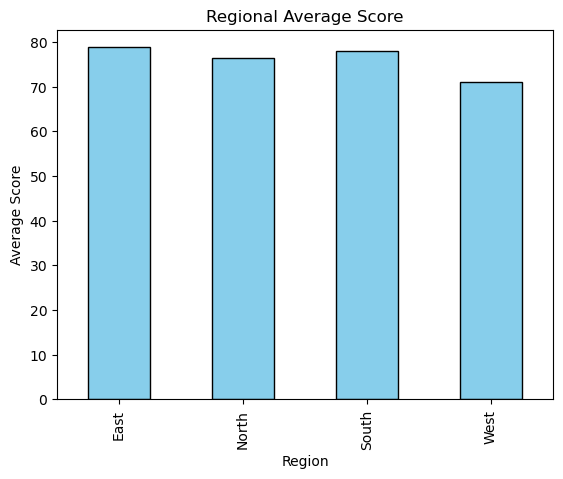

In [28]:
regional_avg.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Regional Average Score")
plt.xlabel("Region")
plt.ylabel("Average Score")
plt.show()

In [14]:
highest_regional_avg = regional_avg.idxmax()
print("Highest regional average:",highest_regional_avg)

Highest regional average: East


In [15]:
lowest_avg = regional_avg.idxmin()
print("Lowest regional average:",lowest_avg)

Lowest regional average: West


**Task 4** GENDER BASED ANALYSIS

In [17]:
gender_avg = df.groupby("Gender")["Score"].mean()     #average score of male and female
print(gender_avg)

Gender
F    79.166667
M    72.960000
Name: Score, dtype: float64


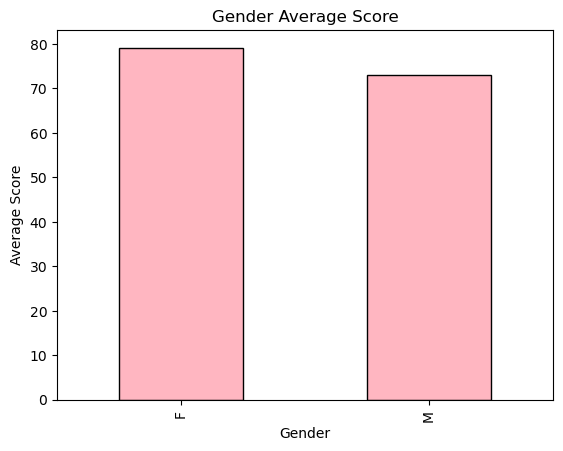

In [29]:
gender_avg.plot(kind = "bar", color = "lightpink", edgecolor = "black")
plt.title("Gender Average Score")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

In [18]:
gender_hours = df.groupby("Gender")["Hours_Studied"].mean()     #average hours studied male and female
print(gender_hours)

Gender
F    10.917647
M    10.258824
Name: Hours_Studied, dtype: float64


In [19]:
max = gender_hours.idxmax()
print("Gender which studied maximum hours:",max)

Gender which studied maximum hours: F


In [20]:
top_f = df[df["Gender"] == "F"].sort_values(by="Score", ascending=False).head(3)
print("Highest scoring females:")    #top 3 females with higest score
print(top_f)


Highest scoring females:
    Student_ID   Name  Subject  Score  Hours_Studied Gender Region
18          19   Isha     Math   93.0      15.000000      F  South
4            5   Neha  Science   92.0      14.000000      F  North
6            7  Meera     Math   85.0      10.588235      F   East


In [21]:
lowest_M = df[df["Gender"] == "M"].sort_values(by="Score").head(2)
print("Lowest scoring males:")
print(lowest_M)

Lowest scoring males:
    Student_ID   Name  Subject  Score  Hours_Studied Gender Region
3            4  Karan     Math   55.0       6.000000      M   West
19          20  Ankit  Science   59.0      10.588235      M   West


**Task 5**  PERFORMANCE CATEGORIZATION

In [22]:
df["Performance"] = df["Score"].apply(lambda x: "High" if x >= 80 else "Low")    #adding new performance column

print(df[["Name", "Score", "Performance"]].head())

    Name  Score Performance
0   Asha   78.0         Low
1    Raj   65.0         Low
2  Priya   82.0        High
3  Karan   55.0         Low
4   Neha   92.0        High


In [23]:
performance_count = df["Performance"].value_counts()         

print("Number of Students by Performance Category:\n")
print(performance_count)

Number of Students by Performance Category:

Performance
Low     12
High     8
Name: count, dtype: int64


In [24]:
performance_by_subject = pd.crosstab(df["Subject"], df["Performance"])

print("Performance Distribution Across Subjects:\n")
print(performance_by_subject)

Performance Distribution Across Subjects:

Performance  High  Low
Subject               
English         2    4
Math            5    2
Science         1    6


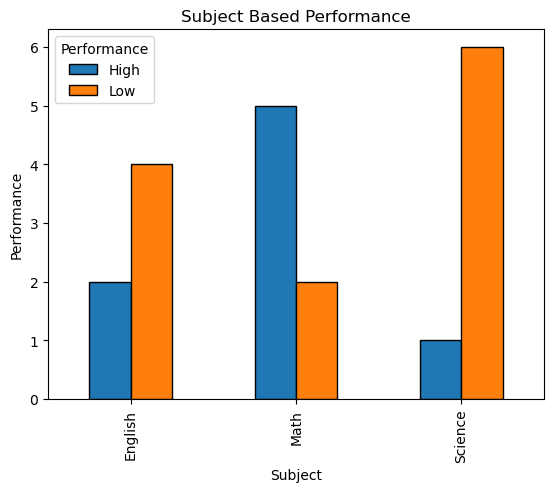

In [32]:
performance_by_subject.plot(kind="bar", edgecolor = "black")
plt.title("Subject Based Performance")
plt.xlabel("Subject")
plt.ylabel("Performance")
plt.show()

**Task 6** INSIGHTS AND TRENDS

**We will plot some more graphs to gather meaningful insights**

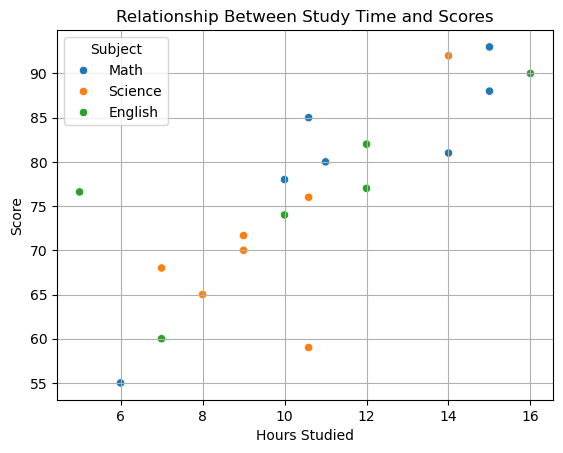

In [36]:
sns.scatterplot(x = "Hours_Studied", y = "Score", data = df ,hue="Subject")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Relationship Between Study Time and Scores")
plt.grid(True)
plt.show()

**Observation from the Scatter Plot**

* General trend:
As Hours Studied increases, the Score also tends to rise — the dots move roughly upward.
This means there is a positive relationship between study time and scores.

* Subject-wise pattern:

For Math, students who studied more (12–15 hours) generally scored higher (around 85–90).

For Science, the same trend holds — longer study hours often give better scores.

For English, there are a few exceptions: some students studied less but still scored well.


* Conclusion

The scatter plot shows a positive but not perfect relationship between study time and scores.
Generally, students who study more score higher, but some perform well even with fewer hours — likely due to better understanding, focus, or study methods.

In [ ]:
# Filter students who scored above 80 with fewer than 10 study hours
high_score_low_study = df[(df["Score"] > 80) & (df["Hours_Studied"] < 10)]

# Display the student(s)
print(high_score_low_study)


Empty DataFrame
Columns: [Student_ID, Name, Subject, Score, Hours_Studied, Gender, Region, Performance]
Index: []


In [38]:
# Filter students who studied more than 12 hours but scored below 70
low_score_high_study = df[(df["Hours_Studied"] > 12) & (df["Score"] < 70)]

# Display the student(s)
print(low_score_high_study)


Empty DataFrame
Columns: [Student_ID, Name, Subject, Score, Hours_Studied, Gender, Region, Performance]
Index: []


* This shows that in your dataset:

1. Higher study hours generally lead to higher scores,

2. Lower study hours generally lead to lower scores,

3. There are no major exceptions — the trend is quite consistent.